# Preprocessing & Modeling

In [1]:
# Load appropriate modules
from os import listdir
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from pathlib import Path
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras import metrics
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 8)
%matplotlib inline

#### Load in Dataframe


In [2]:
train_df = pd.read_csv(r"C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data/train_data.csv",index_col=0)
test_df = pd.read_csv(r"C:/Users/Jake Wojcik/Documents/Springboard/DS Career Track Course/Capstone_3/Data/test_data.csv",index_col=0)

In [3]:
train_df

,path,damage,data_split,location,lon,lat,image
0,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,train_another,-93.55964_30.895018,-93.559640,30.895018,[[[106 118 80]\n [ 90 102 64]\n [ 80 92 ...
1,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,train_another,-93.573763_30.693981,-93.573763,30.693981,[[[ 57 106 51]\n [ 57 106 51]\n [ 57 106 ...
2,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,train_another,-93.578271_30.779923999999998,-93.578271,30.779924,[[[102 105 74]\n [102 105 74]\n [100 103 ...
3,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,train_another,-93.59011_30.695412,-93.590110,30.695412,[[[36 66 40]\n [37 67 41]\n [39 69 43]\n .....
4,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,train_another,-93.59030899999999_30.694764000000003,-93.590309,30.694764,[[[43 47 33]\n [55 59 45]\n [63 67 53]\n .....
...,...,...,...,...,...,...,...
11995,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,validation_another,-97.000188_28.879426000000002,-97.000188,28.879426,[[[ 80 101 70]\n [ 75 96 65]\n [ 68 89 ...
11996,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,validation_another,-97.000443_28.859588000000002,-97.000443,28.859588,[[[ 95 98 87]\n [ 93 96 85]\n [ 91 94 ...
11997,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,validation_another,-97.000872_28.789737,-97.000872,28.789737,[[[102 108 82]\n [128 134 108]\n [135 139 1...
11998,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,validation_another,-97.000945_28.846922999999997,-97.000945,28.846923,[[[ 74 100 65]\n [ 65 91 56]\n [ 62 86 ...


In [4]:
test_df

,path,damage,data_split,location,lon,lat,image
0,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,test,-93.548123_30.900623,-93.548123,30.900623,[[[ 27 37 26]\n [ 26 36 25]\n [ 25 35 ...
1,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,test,-93.560128_30.894917,-93.560128,30.894917,[[[ 39 62 44]\n [ 37 60 42]\n [ 32 55 ...
2,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,test,-93.578271_30.779923999999998,-93.578271,30.779924,[[[102 105 74]\n [102 105 74]\n [100 103 ...
3,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,test,-93.590598_30.694956,-93.590598,30.694956,[[[ 87 96 77]\n [ 89 98 79]\n [ 76 85 ...
4,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,damage,test,-93.604017_30.793719,-93.604017,30.793719,[[[83 88 48]\n [84 89 49]\n [86 91 51]\n .....
...,...,...,...,...,...,...,...
10995,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,test_another,-96.99941899999999_28.784907,-96.999419,28.784907,[[[ 88 106 64]\n [ 89 106 64]\n [ 90 107 ...
10996,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,test_another,-96.99991_28.801191999999997,-96.999910,28.801192,[[[ 69 68 63]\n [ 81 80 75]\n [117 116 1...
10997,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,test_another,-97.000824_28.790071,-97.000824,28.790071,[[[ 86 96 62]\n [ 86 96 62]\n [ 86 96 ...
10998,C:\Users\Jake Wojcik\Documents\Springboard\DS ...,no_damage,test_another,-97.001092_28.887828999999996,-97.001092,28.887829,[[[ 95 88 72]\n [ 95 88 72]\n [103 96 ...


In [5]:
# encode damage to 1 and no_damaged to 0 in order to feed into nueral network
#train_df['damage'].loc[train_df.damage == "damage"] = 1
#train_df['damage'].loc[train_df.damage == "no_damage"] = 0
#test_df['damage'].loc[test_df.damage == "damage"] = 1
#test_df['damage'].loc[test_df.damage == "no_damage"] = 0

In [6]:
#Separate train & validation sets
validation_df = train_df[train_df['data_split']=='validation_another']
train_df = train_df[train_df['data_split']=='train_another']

In [7]:
# separate test dataset into balanced and unbalanced sets
test_balanced_df = test_df[test_df['data_split']=='test']
test_unbalanced_df = test_df[test_df['data_split']=='test_another']

In [9]:
#Randomly shuffle dataframes
train_df = train_df.sample(frac=1).reset_index(drop=True)
validation_df = validation_df.sample(frac=1).reset_index(drop=True)
test_balanced_df = test_balanced_df.sample(frac=1).reset_index(drop=True)
test_unbalanced_df = test_unbalanced_df.sample(frac=1).reset_index(drop=True)

### Create Generators 

In [10]:
datagen=ImageDataGenerator(rescale=1./255.)
#generate train Dataframe
train_generator= datagen.flow_from_dataframe(
dataframe=train_df,
directory=None,
x_col="path",
y_col="damage",
subset="training",
batch_size=50,
seed=9,
shuffle=False,
class_mode="binary",
target_size=(128,128))

# Generate validation dataframe
validation_generator= datagen.flow_from_dataframe(
dataframe=validation_df,
directory=None,
x_col="path",
y_col="damage",
batch_size=50,
seed=9,
shuffle=False,
class_mode="binary",
target_size=(128,128))

#Generate balanced test dataframe
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(
dataframe=test_balanced_df,
directory=None,
x_col="path",
y_col="damage",
batch_size=50,
seed=9,
shuffle=False,
class_mode='binary',
target_size=(128,128))

#Generate unbalanced test dataframe
test_datagen_un = ImageDataGenerator(rescale=1./255.)
test_generator_un = test_datagen.flow_from_dataframe(
dataframe=test_unbalanced_df,
directory=None,
x_col="path",
y_col="damage",
batch_size=50,
seed=9,
shuffle=False,
class_mode='binary',
target_size=(128,128))

Found 10000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 9000 validated image filenames belonging to 2 classes.


Define custom metrics for the model

In [11]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Build the Model

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Compile
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy',f1_m, recall_m, precision_m])

### Train the model

In [13]:
train_steps = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

history = model.fit(train_generator,steps_per_epoch=train_steps,validation_data=validation_generator,validation_steps=validation_steps,epochs=20)

Epoch 1/20
200/200 [==============================] - 111s 554ms/step - loss: 0.4312 - accuracy: 0.7743 - f1_m: 0.7778 - recall_m: 0.8443 - precision_m: 0.7651 - val_loss: 0.2064 - val_accuracy: 0.9140 - val_f1_m: 0.9091 - val_recall_m: 0.8810 - val_precision_m: 0.9426
Epoch 2/20
200/200 [==============================] - 112s 559ms/step - loss: 0.1891 - accuracy: 0.9228 - f1_m: 0.9204 - recall_m: 0.9100 - precision_m: 0.9379 - val_loss: 0.1602 - val_accuracy: 0.9335 - val_f1_m: 0.9338 - val_recall_m: 0.9534 - val_precision_m: 0.9182
Epoch 3/20
200/200 [==============================] - 115s 577ms/step - loss: 0.1429 - accuracy: 0.9417 - f1_m: 0.9404 - recall_m: 0.9374 - precision_m: 0.9480 - val_loss: 0.1486 - val_accuracy: 0.9505 - val_f1_m: 0.9498 - val_recall_m: 0.9445 - val_precision_m: 0.9581
Epoch 4/20
200/200 [==============================] - 111s 556ms/step - loss: 0.1047 - accuracy: 0.9601 - f1_m: 0.9590 - recall_m: 0.9556 - precision_m: 0.9651 - val_loss: 0.1152 - val_accur

In [14]:
def model_plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['acc', 'val_acc'])
    plt.title('Accuracy')
    plt.ylim(0.5,1)
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.title('Loss')
    plt.ylim(0,1)
    plt.show()

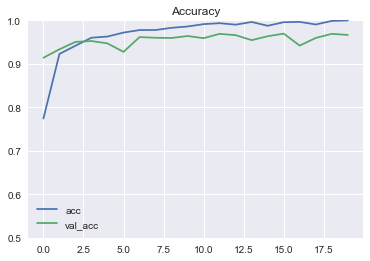

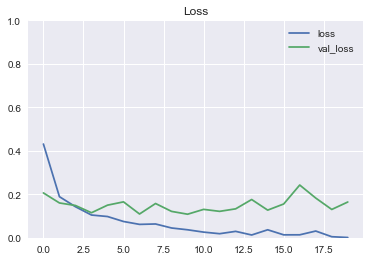

In [15]:
model_plots(history)

### Test the model

In [16]:
#Test on balanced test set
test_generator.reset()
step_size_test = test_generator.n // test_generator.batch_size
model_loss, model_acc, model_f1, model_recall, model_precision = model.evaluate_generator(generator = test_generator, steps = step_size_test)
print('Loss:', '%.2f'%model_loss, 'Acc:', '%.2f'%model_acc, 'F1 Score:', '%.2f'%model_f1, 'Recall:', '%.2f'%model_recall, 'Precision:', '%.2f'%model_precision)

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss: 0.10 Acc: 0.98 F1 Score: 0.98 Recall: 0.98 Precision: 0.99


In [17]:
#Test on unbalanced test set
test_generator_un.reset()
step_size_test_un = test_generator_un.n // test_generator_un.batch_size
model_loss, model_acc, model_f1, model_recall, model_precision = model.evaluate_generator(generator = test_generator_un, steps = step_size_test_un)
print('Loss:', '%.2f'%model_loss, 'Acc:', '%.2f'%model_acc, 'F1 Score:', '%.2f'%model_f1, 'Recall:', '%.2f'%model_recall, 'Precision:', '%.2f'%model_precision)

Loss: 0.12 Acc: 0.98 F1 Score: 0.89 Recall: 0.96 Precision: 0.85


Looks like our model performs fairly well on both the balanced and unbalanced test sets. Our model is better at finding members of the positive class than correctly classifying members of the positive class. This means our model has very little false negatives and the classifier is more permissive in the criteria for classifying something as positive. 

In [18]:
# save model
model.save(r"C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_3\Models\model_shuff")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_3\Models\model_shuff\assets


In [19]:
from keras.models import load_model
#load saved model from folder
loaded_model = load_model(r"C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_3\Models\model_shuff", custom_objects = {'f1_m':f1_m, 'recall_m':recall_m, 'precision_m':precision_m})
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [20]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = validation_generator.n // validation_generator.batch_size

#retrieve training metrics for saved model
train_generator.reset()
train_loss, train_acc, train_f1, train_recall, train_precision = loaded_model.evaluate_generator(generator = train_generator, steps=step_size_train)

#retrieve validation metrics for saved model
validation_generator.reset()
val_loss, val_acc, val_f1, val_recall, val_precision = loaded_model.evaluate_generator(generator = validation_generator, steps = step_size_val)

#retrieve test metrics for saved model
test_generator.reset()
test_loss, test_acc, test_f1, test_recall, test_precision = loaded_model.evaluate_generator(generator = test_generator)

In [21]:
print('TRAINING')
print('Loss:', "%.2f" % train_loss, 'Acc:', "%.2f" % train_acc, 'F1 Score:', "%.2f" % train_f1, 'Recall:', "%.2f" % train_recall, 'Precision:', "%.2f" % train_precision)
print('')
print('VALIDATION')
print('Loss:', "%.2f" % val_loss, 'Acc:', "%.2f" % val_acc, 'F1 Score:', "%.2f" % val_f1, 'Recall:', "%.2f" % val_recall, 'Precision:', "%.2f" % val_precision)
print('TEST')
print('Loss:', "%.2f" % test_loss, 'Acc:', "%.2f" % test_acc, 'F1 Score:', "%.2f" % test_f1, 'Recall:', "%.2f" % test_recall, 'Precision:', "%.2f" % test_precision)

TRAINING
Loss: 0.00 Acc: 1.00 F1 Score: 1.00 Recall: 1.00 Precision: 1.00

VALIDATION
Loss: 0.16 Acc: 0.97 F1 Score: 0.97 Recall: 0.96 Precision: 0.98
TEST
Loss: 0.10 Acc: 0.98 F1 Score: 0.98 Recall: 0.98 Precision: 0.99


### ROC & Precision Recall Curve

We'll use an ROC curve for our balanced test set and a precision-recall curve for the unbalanced test set.

In [22]:
# encode damage to 1 and no_damaged to 0 in order to plot ROC 
train_df['damage'].loc[train_df.damage == "damage"] = 1
train_df['damage'].loc[train_df.damage == "no_damage"] = 0
test_balanced_df['damage'].loc[test_balanced_df.damage == "damage"] = 1
test_balanced_df['damage'].loc[test_balanced_df.damage == "no_damage"] = 0


In [28]:
test_unbalanced_df['damage'].loc[test_unbalanced_df.damage == "damage"] = 1
test_unbalanced_df['damage'].loc[test_unbalanced_df.damage == "no_damage"] = 0

In [30]:
test_generator.reset()
predict_proba = loaded_model.predict(test_generator)
pred = np.multiply((predict_proba > 0.5), 1)
df_results = test_balanced_df.copy()
df_results['pred'] = pred

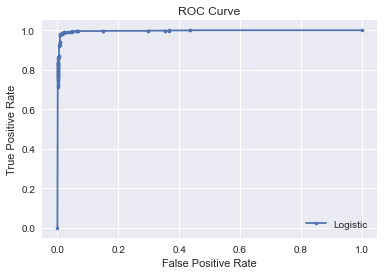

AUC Score: 0.997


In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
precision, recall, thresholds = roc_curve(test_balanced_df.damage.astype(int),predict_proba)

#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

print('AUC Score: %.3f'% auc(recall, precision))

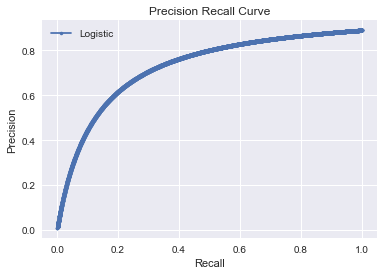

AUC Score: 0.726


In [39]:
test_generator_un.reset()
predict_proba = loaded_model.predict(test_generator_un)
pred = np.multiply((predict_proba > 0.5), 1)
precision, recall, thresholds = precision_recall_curve(test_unbalanced_df.damage.astype(int),predict_proba)

#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall[:-1], precision[:-1], marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision Recall Curve')
plt.show()

print('AUC Score: %.3f'% auc(recall, precision))